In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
import json
from tensorflow.keras.models import model_from_json

In [2]:
movie_train = pd.read_csv('./../assets/movie_reviews.csv')

#### Above read dataanime for to train reviews

In [3]:
print(f"Data Shape: {movie_train}")

Data Shape:                critic_name                         media         movie_title  \
0            M. E. Russell            Portland Oregonian       Hustle & Flow   
1          Owen Gleiberman          Entertainment Weekly       Hustle & Flow   
2             Ann Hornaday               Washington Post       Hustle & Flow   
3       Stephanie Zacharek                         Salon       Hustle & Flow   
4             Jami Bernard           New York Daily News       Hustle & Flow   
...                    ...                           ...                 ...   
246950      John Patterson                   L.A. Weekly  The Quiet American   
246951          Rick Groen  The Globe and Mail (Toronto)  The Quiet American   
246952    Jonathan Foreman                 New York Post  The Quiet American   
246953        Jami Bernard           New York Daily News  The Quiet American   
246954   Stanley Kauffmann              The New Republic  The Quiet American   

       review_date  individ

In [4]:
print(movie_train.columns)

Index(['critic_name', 'media', 'movie_title', 'review_date',
       'individual_meta_score', 'text'],
      dtype='object')


In [5]:
ranked_movie = movie_train[['text', 'individual_meta_score']].sort_values(by='individual_meta_score')

In [6]:
ranked_movie

,text,individual_meta_score
86880,"Ultimately, one has to chalk up The Pink Panth...",0
59579,Can we finally just admit that Dane Cook isn't...,0
59578,If raunch-comedy maestro Judd Apatow had not j...,0
59577,It was like a Farrelly brothers gross-out with...,0
59576,It's stupefying in its dullness and vulgarity.,0
...,...,...
226853,"A spooky, heartbreaking documentary.",100
226820,By adamantly focusing above all else on van Go...,100
226819,It’s a beautiful visual and spiritual journey ...,100
227011,Remarkably fresh and inventive.,100


In [7]:
ranked_movie['individual_meta_score'].median()

63.0

In [8]:
ranked_movie['individual_meta_score'].mode()

0    50
dtype: int64

In [9]:
ranked_movie['individual_meta_score'].mean()

62.57880585531777

#### Mean and Median Score is very close to lowest score so we use regression 

In [10]:
regression_movie = ranked_movie['individual_meta_score'].value_counts()

In [11]:
ra_movie = ranked_movie.groupby(['individual_meta_score'],as_index=False).count()
ra_movie

,individual_meta_score,text
0,0,1680
1,1,1
2,4,1
3,5,13
4,6,4
...,...,...
93,96,4
94,97,6
95,98,7
96,99,1


#### math calculation of positive, negative and natural range

In [12]:
range = 100 - 0
range

100

In [13]:
round(range/3)

33

#### Math calculation says use 33 for each situation.
#### We check it as below analysis

In [14]:
ra_movie = ra_movie.rename(columns={'individual_meta_score': 'points', 'text': 'count'})


In [15]:
ra_movie

,points,count
0,0,1680
1,1,1
2,4,1
3,5,13
4,6,4
...,...,...
93,96,4
94,97,6
95,98,7
96,99,1


In [16]:
X = ra_movie['points'].values
y = ra_movie['count'].values
X

array([  0,   1,   4,   5,   6,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

In [17]:
X=X.reshape(-1,1)
X

array([[  0],
       [  1],
       [  4],
       [  5],
       [  6],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 73],
      

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (68, 1)
y_train shape (68,)
X_test shape (30, 1)
y_test shape (30,)
[ 8830  8225 18651   209    11     4     3 11454  2113  4414    47   665
     1    38    13     3    39   120     6     7   273    11    15    16
     2     1    19    13    30     4]


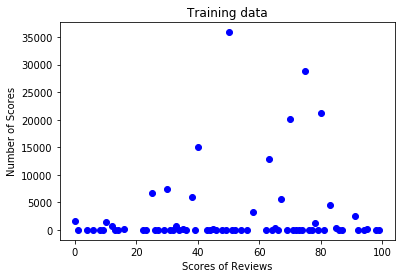

In [20]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Reviews' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 1.36 %
Test accuracy 4.3 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

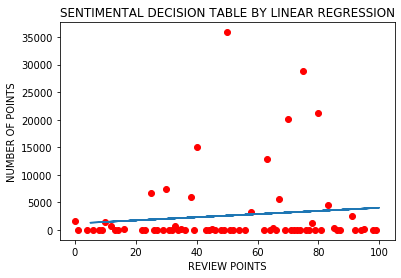

In [22]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

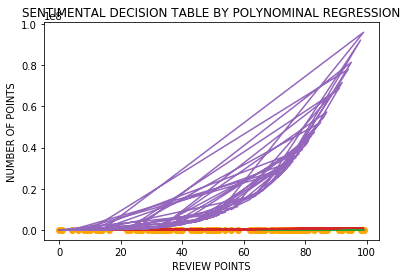

In [23]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("REVIEW POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [24]:
def create_sentiment(int):
    if int >=0 and int<40:
        return 0
    if int>=40 and int<80:
        return 1
    if int>=80 and int<101:
        return 2

### Above the decision of breakpoints are given 

In [25]:
ranked_movie['sentiment'] = ranked_movie['individual_meta_score'].apply(create_sentiment)

In [26]:
ranked_movie

,text,individual_meta_score,sentiment
86880,"Ultimately, one has to chalk up The Pink Panth...",0,0
59579,Can we finally just admit that Dane Cook isn't...,0,0
59578,If raunch-comedy maestro Judd Apatow had not j...,0,0
59577,It was like a Farrelly brothers gross-out with...,0,0
59576,It's stupefying in its dullness and vulgarity.,0,0
...,...,...,...
226853,"A spooky, heartbreaking documentary.",100,2
226820,By adamantly focusing above all else on van Go...,100,2
226819,It’s a beautiful visual and spiritual journey ...,100,2
227011,Remarkably fresh and inventive.,100,2


In [27]:
def clean_text(str):
    return str.replace(',', ';')
                       

In [28]:
ranked_movie['text'] = ranked_movie['text'].apply(clean_text)

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
ranked_movie

In [ ]:
ranked_movie.to_csv('movie_review.csv')

In [ ]:
movie_df = pd.read_csv('movie_review.csv')

In [ ]:
movie_df

In [ ]:
movie_df.columns=['Unnamed: 0', 'text' , 'individual_meta_score' , 'sentiment']
movie_training_df = movie_df[['text', 'sentiment']].dropna()
movie_training_df.sample(5)

In [ ]:
movie_y = movie_training_df.sentiment
print(movie_y)

In [ ]:
movie_x = movie_training_df.text
print(movie_x)

In [ ]:
movie_training_df.describe()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(movie_x)

In [ ]:
movie_x = tokenizer.texts_to_sequences(movie_x)

In [ ]:
movie_x = tokenizer.sequences_to_matrix(movie_x)
movie_x

In [ ]:
print(type(review_x))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [ ]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


In [ ]:
review_y = keras.utils.to_categorical(review_y,3)

In [ ]:
review_y

#### x and y axis created for machine learning, now it is time for layers between input and output

In [ ]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [ ]:
model.add(Dense(755, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [ ]:
model.add(Dense(555, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 40%

In [ ]:
model.add(Dense(333, activation = 'linear'))
model.add(Dropout(0.40))

#### 4th layer act softsign no drop

In [ ]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [ ]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
    review_x, review_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

In [ ]:
final_model_1 = model.to_json()
with open('final_model_1.json', 'w') as json_file:
    json_file.write(final_model_1)
model.save_weights('final_model_1.h5')

In [ ]:
final_dict_1 = tokenizer.word_index
with open('final_dict_1.json', 'w') as d:
    json.dump(final_dict_1, d)

In [ ]:
tokenizer = Tokenizer(num_words=22454)

In [ ]:
labels = ['negative', 'natural', 'positive']

In [ ]:
with open('final_dict_1.json', 'r') as dictionary_file:
    dictionary = json.load(dictionary_file)

In [ ]:
def convert_text_to_index_array(text):
    words = tfkpt.text_to_word_sequence(text)
    testArr = []
    for word in words:
        if word in dictionary:
            testArr.append(dictionary[word])
        else:
            print("'%s' is not related with an anime," %(word))
            raise Exception('Please do not use this idea!!!')
    return testArr

In [ ]:
json_file = open('final_model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
model = model_from_json(loaded_model_json)

In [ ]:
model.load_weights('final_model_1.h5')

In [ ]:
evalSentence = input('Tell me your idea, Enter to quit: ')


        

In [ ]:
testArr = convert_text_to_index_array(evalSentence)
print(evalSentence)

In [ ]:
input = tokenizer.sequences_to_matrix([testArr], mode='binary')

In [ ]:
pred = model.predict(input)
print(input)
print(testArr)
print(model)

print(testArr)
print('*******',pred)


In [ ]:
print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)]* 100))